<a href="https://colab.research.google.com/github/MarceloGustavoCordoba/Proyecto2023GrupoCCCC/blob/main/Claudio_Chacon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import pandas as pd
#voy a importar el abecedario para trabajar con letras
# mayusculas uppercase
# minusculas lowercase
from string import ascii_uppercase as alfabeto
df = pd.read_csv('songs_normalize.csv', encoding='latin-1')

df = df.rename(columns={
    'artist':'Artista',
    'song':'Cancion',
    'duration_ms':'Duracion',
    'explicit':'Explicito',
    'year':'Año',
    'popularity':'Popularidad',
    'danceability':'Bailabilidad',
    'energy':'Energia',
    'key':'Clave',
    'loudness':'Volumen',
    'mode':'Modo',
    'speechiness':'Palabra_Hablada',
    'acousticness':'Acustica',
    'instrumentalness':'Instrumentalidad',
    'liveness':'Vivacidad',
    'valence':'Valencia',
    'tempo':'Tempo',
    'genre':'Genero'
})
df

Artista                                 Cancion  Duracion  \
0     Britney Spears                  Oops!...I Did It Again    211160   
1          blink-182                    All The Small Things    167066   
2         Faith Hill                                 Breathe    250546   
3           Bon Jovi                            It's My Life    224493   
4             *NSYNC                             Bye Bye Bye    200560   
...              ...                                     ...       ...   
1995  Jonas Brothers                                  Sucker    181026   
1996    Taylor Swift                            Cruel Summer    178426   
1997    Blanco Brown                              The Git Up    200593   
1998       Sam Smith  Dancing With A Stranger (with Normani)    171029   
1999     Post Malone                                 Circles    215280   

      Explicito   Año  Popularidad  Bailabilidad  Energia  Clave  Volumen  \
0         False  2000           77         0.751    0.834      1   -5.444   
1         False  1999           79         0.434    0.897      0   -4.918   
2         False  1999           66         0.529    0.496      7   -9.007   
3         False  2000           78         0.551    0.913      0   -4.063   
4         False  2000           65         0.614    0.928      8   -4.806   
...         ...   ...          ...           ...      ...    ...      ...   
1995      False  2019           79         0.842    0.734      1   -5.065   
1996      False  2019           78         0.552    0.702      9   -5.707   
1997      False  2019           69         0.847    0.678      9   -8.635   
1998      False  2019           75         0.741    0.520      8   -7.513   
1999      False  2019           85         0.695    0.762      0   -3.497   

      Modo  Palabra_Hablada  Acustica  Instrumentalidad  Vivacidad  Valencia  \
0        0           0.0437    0.3000          0.000018     0.3550     0.894   
1        1           0.0488    0.0103          0.000000     0.6120     0.684   
2        1           0.0290    0.1730          0.000000     0.2510     0.278   
3        0           0.0466    0.0263          0.000013     0.3470     0.544   
4        0           0.0516    0.0408          0.001040     0.0845     0.879   
...    ...              ...       ...               ...        ...       ...   
1995     0           0.0588    0.0427          0.000000     0.1060     0.952   
1996     1           0.1570    0.1170          0.000021     0.1050     0.564   
1997     1           0.1090    0.0669          0.000000     0.2740     0.811   
1998     1           0.0656    0.4500          0.000002     0.2220     0.347   
1999     1           0.0395    0.1920          0.002440     0.0863     0.553   

        Tempo            Genero  
0      95.053               pop  
1     148.726         rock, pop  
2     136.859      pop, country  
3     119.992       rock, metal  
4     172.656               pop  
...       ...               ...  
1995  137.958               pop  
1996  169.994               pop  
1997   97.984  hip hop, country  
1998  102.998               pop  
1999  120.042           hip hop  

[2000 rows x 18 columns]

In [30]:
summarized_data_genre_wise = df.groupby('Genero').agg(avg_Palabra=('Palabra_Hablada', 'mean'))
#summarized_data_genre_wise = summarized_data_genre_wise.round().astype(float)

# Ordenar por palabras promedio en orden descendente
summarized_data_genre_wise = summarized_data_genre_wise.sort_values('avg_Palabra', ascending=False)

# Mostrar el DataFrame resultante

#print(summarized_data_genre_wise)

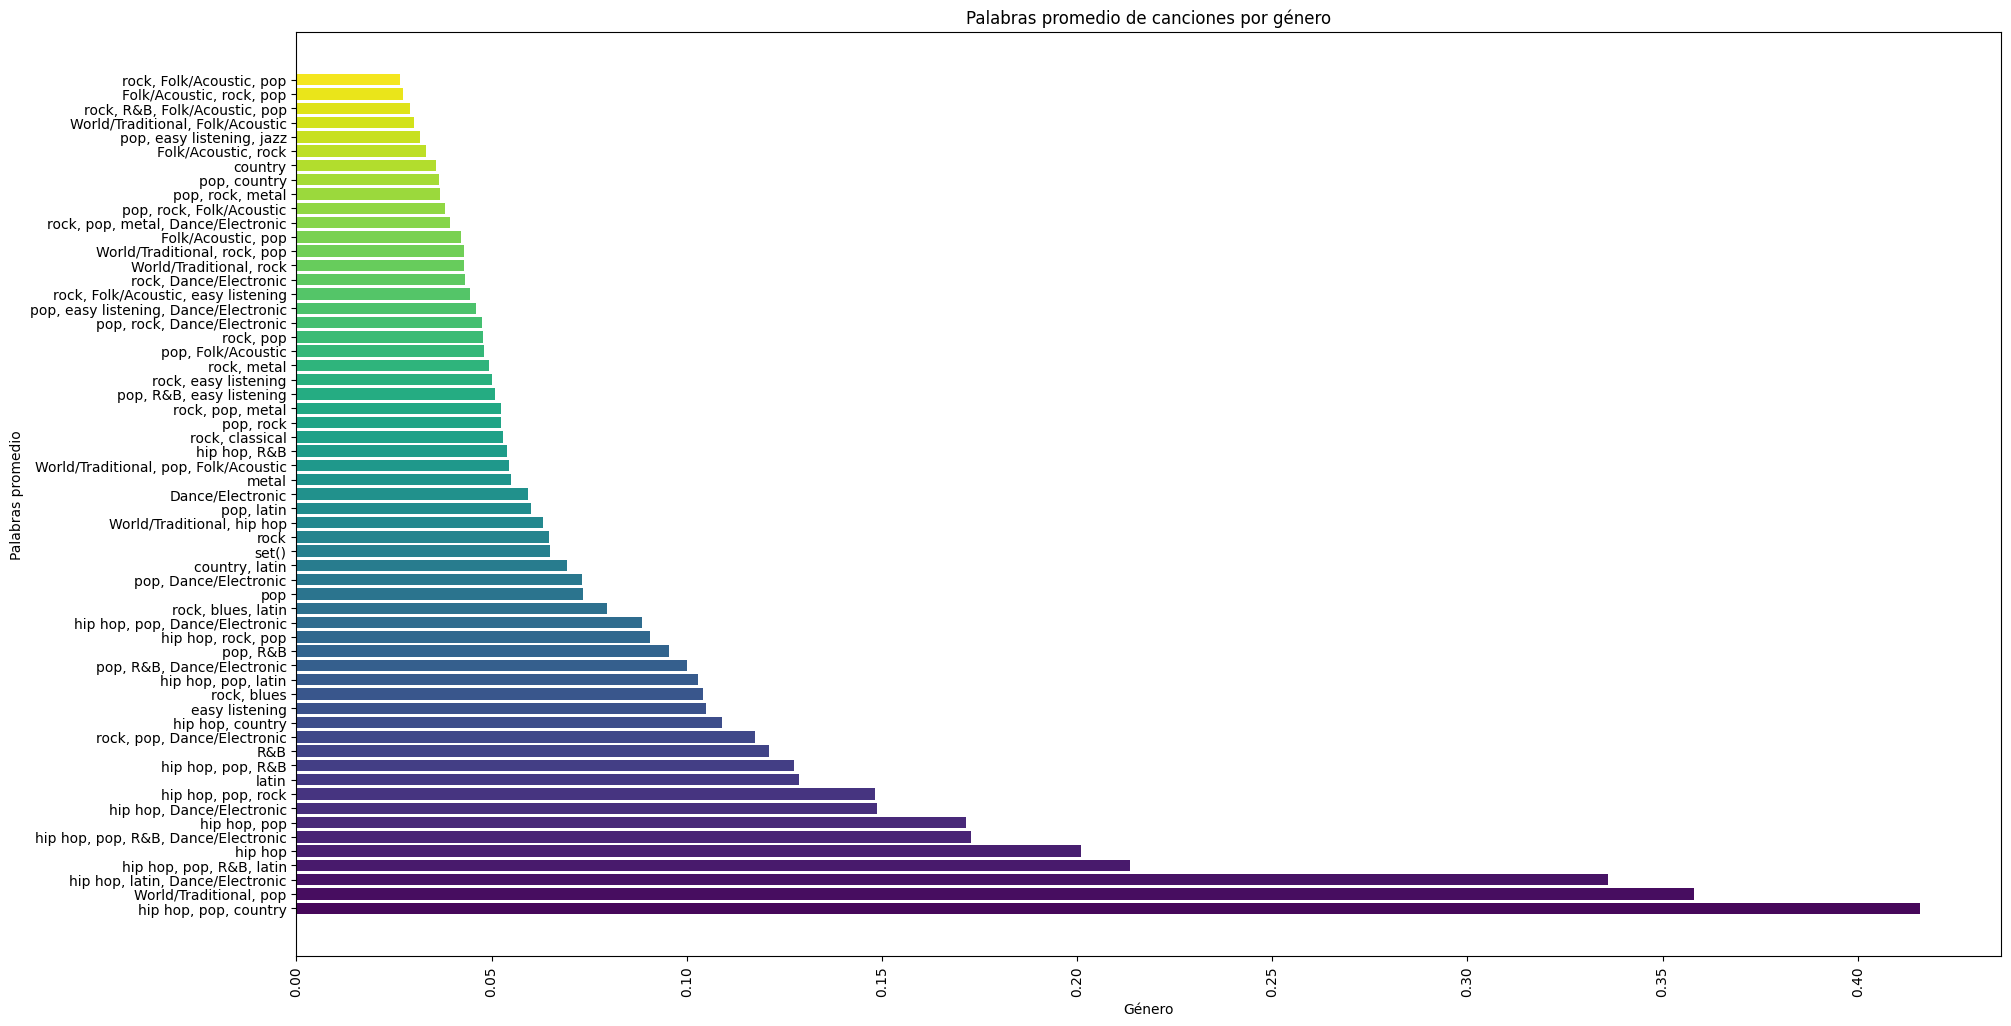

In [29]:
# Crear una paleta de colores gradual
#color_palette = sns.color_palette("viridis", len(summarized_data_genre_wise))

# Crear el gráfico de barras con colores gradualmente cambiantes
plt.figure(figsize=(22, 12))
plt.barh( summarized_data_genre_wise.index, summarized_data_genre_wise['avg_Palabra'],  color=color_palette)
plt.xlabel('Género')
plt.ylabel('Palabras promedio')
plt.title('Palabras promedio de canciones por género')
plt.xticks(rotation=90)
plt.show()

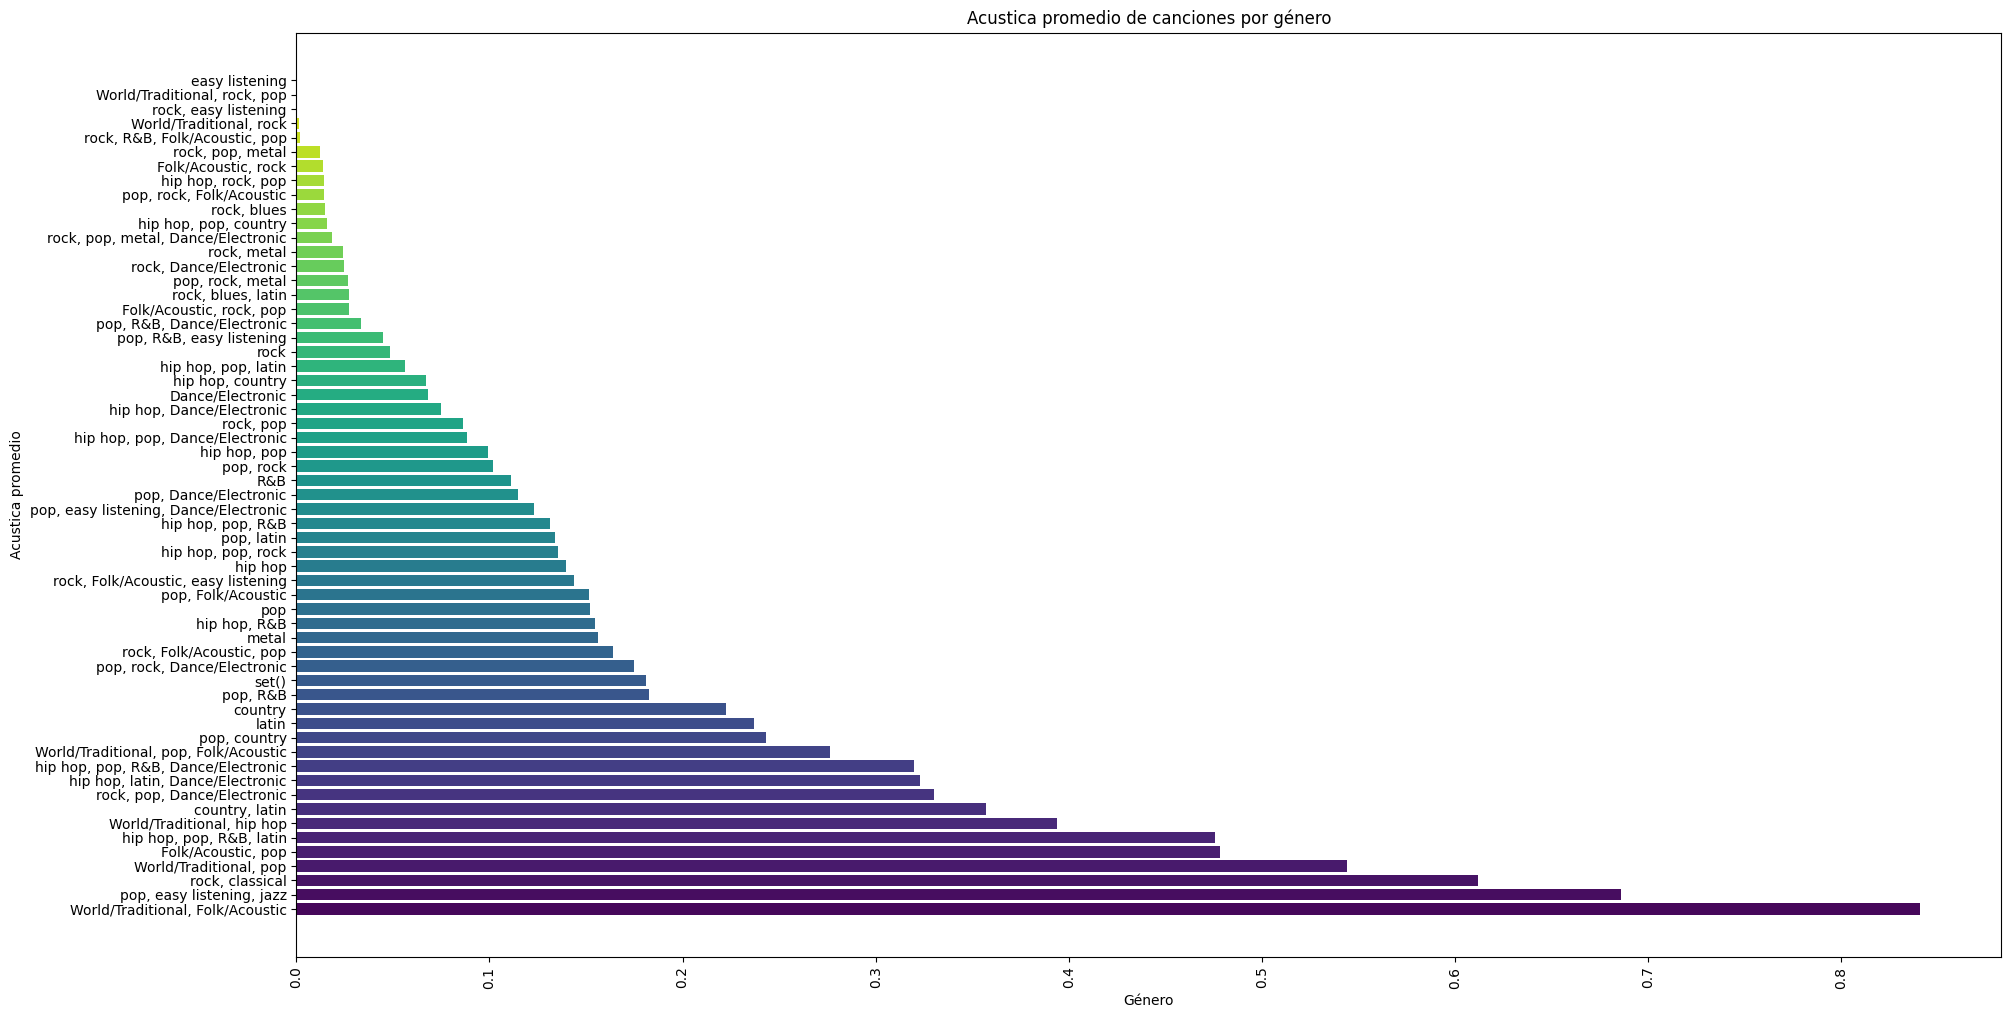

In [68]:
summarized_data_genre_wise = df.groupby('Genero').agg(avg_Acustica=('Acustica', 'mean'))
#summarized_data_genre_wise = summarized_data_genre_wise.round().astype(float)

# Ordenar por palabras promedio en orden descendente
summarized_data_genre_wise = summarized_data_genre_wise.sort_values('avg_Acustica', ascending=False)

# Mostrar el DataFrame resultante

#print(summarized_data_genre_wise)

# Crear el gráfico de barras con colores gradualmente cambiantes
plt.figure(figsize=(22, 12))
plt.barh( summarized_data_genre_wise.index, summarized_data_genre_wise['avg_Acustica'],  color=color_palette)
plt.xlabel('Género')
plt.ylabel('Acustica promedio')
plt.title('Acustica promedio de canciones por género')
plt.xticks(rotation=90)
plt.show()

Al analizar los géneros por la cantidad de palabras, vemos que el género HIP HOP y sus variantes es el que mayor cantidad de palabras utiliza. Esto coincide con lo esperado para ese género musical, siendo la música Acústica en sus distintas variantes la de menor cantidad lo cual también eran lo esperable.

En cuanto a lo acústico de un tema, tal como se espera el Genero Acústico es el de mayor cantidad de componentes de Acústica y el Hip Hop el menor. Estos datos nos servirán para el próximo análisis.

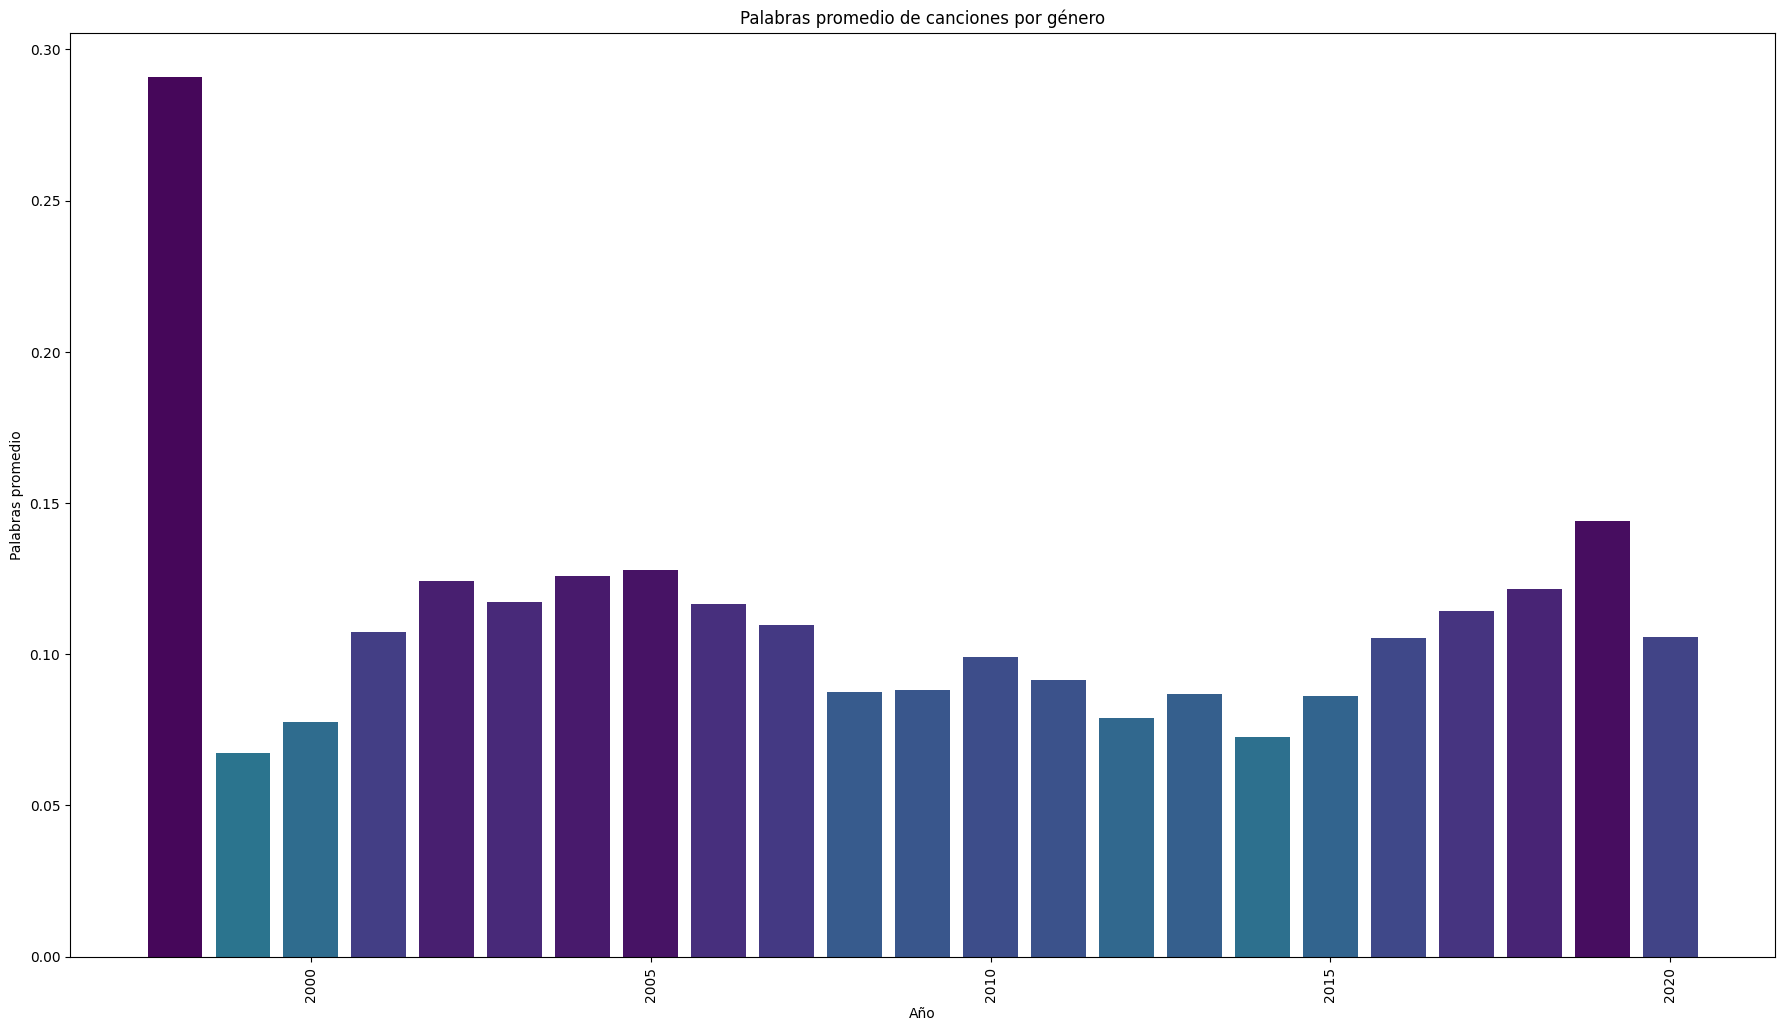

In [32]:
summarized_data_genre_wise = df.groupby('Año').agg(avg_Palabra=('Palabra_Hablada', 'mean'))
#summarized_data_genre_wise = summarized_data_genre_wise.round().astype(float)

# Ordenar por palabras promedio en orden descendente
summarized_data_genre_wise = summarized_data_genre_wise.sort_values('avg_Palabra', ascending=False)

# Mostrar el DataFrame resultante

#print(summarized_data_genre_wise)


# Crear el gráfico de barras con colores gradualmente cambiantes
plt.figure(figsize=(22, 12))
plt.bar( summarized_data_genre_wise.index, summarized_data_genre_wise['avg_Palabra'],  color=color_palette)
plt.xlabel('Año')
plt.ylabel('Palabras promedio')
plt.title('Palabras promedio de canciones por género')
plt.xticks(rotation=90)
plt.show()

Cuando vemos la cantidad promedio de palabras en los temas, por año.

Nos hace suponer una variabilidad con un patrón oscilante entre los años. Esto nos hace presuponer el cambio de popularidad de los géneros (ya que en los gráficos anteriores corroboramos que la cantidad de palabras estaba fuertemente ligada al tipo de genero) a través de los años. Para eso deberemos realizar un análisis agrupando los géneros según su popularidad por año

In [66]:
summarized_data_genre_wise = df.groupby(by=['Año','Genero']).agg(sum_Popularidad=('Popularidad', 'sum'))
#summarized_data_genre_wise = summarized_data_genre_wise.round().astype(float)

# Ordenar por palabras promedio en orden descendente
summarized_data_genre_wise = summarized_data_genre_wise.sort_values(by=['Año','sum_Popularidad'], ascending=True)

# Mostrar el DataFrame resultante

print(summarized_data_genre_wise)

                                          sum_Popularidad
Año  Genero                                              
1998 hip hop, pop, R&B                                 49
1999 Dance/Electronic                                  56
     rock, Folk/Acoustic, easy listening               65
     pop, country                                      66
     rock, blues, latin                                66
...                                                   ...
2019 hip hop                                          824
     pop                                             1519
2020 hip hop, pop                                      34
     pop                                               39
     World/Traditional, hip hop                        57

[381 rows x 1 columns]


Aquí podemos comprobar que nuestra presunción anterior es cierta, siendo entre los años 2000 y 2005 más popular los géneros como HIHOP, dando luego paso al POP y sus variantes, hasta el año 2012. Luego junto con el Dance será lo predominante hasta el 2015 año en que comienza a retomarse la preferencia por el HIPHOP